In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Read

In [2]:
dirpath = os.path.join(Path.home(), "FjordsSim_data", "sognefjord")
ds = xr.open_dataset(os.path.join(dirpath, "sogn800LL_2018.nc"))

In [3]:
ds["depth"] = -ds.depth

In [4]:
ds = ds.rename({"Ix": "Nx", "Jy": "Ny", "depth": "Nz", "temp": "T", "salt": "S", "U": "u", "V": "v"})

In [1]:
# THESE COORDINATES DO NOT WORK
xrivers = [235, 228, 197, 170]
yrivers = [83, 119, 32, 100]

# Transect plotting

In [7]:
# import matplotlib
# matplotlib.use('TkAgg') # Tk to use in jupyter

In [12]:
# ds.T.isel(time=0).sel(Nz=-3).plot()
# plt.ginput(60)

In [8]:
# points from ginput
points = np.array([(np.float64(0), np.float64(42.89484335182133)),
 (np.float64(27.29065860215053), np.float64(42.89484335182133)),
 (np.float64(34.08837365591397), np.float64(45.533128466496784)),
 (np.float64(41.88575268817203), np.float64(52.128841253185435)),
 (np.float64(52.48219086021504), np.float64(58.7245540398741)),
 (np.float64(62.07896505376344), np.float64(65.15537400689553)),
 (np.float64(68.47681451612902), np.float64(64.49580272822666)),
 (np.float64(76.67405913978494), np.float64(62.02241043321842)),
 (np.float64(81.87231182795698), np.float64(58.559661220206884)),
 (np.float64(95.26780913978494), np.float64(65.81494528556439)),
 (np.float64(112.86189516129032), np.float64(71.7510867935842)),
 (np.float64(120.85920698924731), np.float64(70.7617298755809)),
 (np.float64(129.85618279569894), np.float64(69.44258731824314)),
 (np.float64(136.45396505376345), np.float64(69.44258731824314)),
 (np.float64(144.2513440860215), np.float64(65.48515964622996)),
 (np.float64(149.2496639784946), np.float64(64.16601708889223)),
 (np.float64(157.44690860215053), np.float64(67.13408784290212)),
 (np.float64(160.64549731182797), np.float64(71.35744266226953)),
 (np.float64(161.64549731182797), np.float64(77.35744266226953)),
 (np.float64(167.8434139784946), np.float64(75.86276420326789)),
 (np.float64(174.24126344086022), np.float64(74.22447908859243)),
 (np.float64(180.43918010752685), np.float64(72.57555089192027)),
 (np.float64(183.03830645161287), np.float64(68.45323040023985)),
 (np.float64(184.03797043010752), np.float64(66.63940938390047)),
 (np.float64(187.83669354838707), np.float64(64.66069554789388)),
 (np.float64(193.63474462365588), np.float64(68.12344476090541)),
 (np.float64(198.63306451612902), np.float64(68.9479088592415)),
 (np.float64(202.43178763440858), np.float64(72.07022935092192))])

In [9]:
npoints = points.shape[0]

In [10]:
xs = points[:,0]
ys = points[:,1]
xs_target = np.arange(202)
ys_target = np.interp(xs_target, xs, ys)
ys_target = np.rint(ys_target)

In [11]:
ys_target

array([43., 43., 43., 43., 43., 43., 43., 43., 43., 43., 43., 43., 43.,
       43., 43., 43., 43., 43., 43., 43., 43., 43., 43., 43., 43., 43.,
       43., 43., 43., 44., 44., 44., 45., 45., 45., 46., 47., 48., 49.,
       50., 51., 51., 52., 53., 53., 54., 55., 55., 56., 57., 57., 58.,
       58., 59., 60., 60., 61., 62., 62., 63., 64., 64., 65., 65., 65.,
       65., 65., 65., 65., 64., 64., 64., 63., 63., 63., 63., 62., 62.,
       61., 60., 60., 59., 59., 59., 60., 60., 61., 61., 62., 62., 63.,
       64., 64., 65., 65., 66., 66., 66., 67., 67., 67., 68., 68., 68.,
       69., 69., 69., 70., 70., 70., 71., 71., 71., 72., 72., 71., 71.,
       71., 71., 71., 71., 71., 71., 70., 70., 70., 70., 70., 70., 70.,
       69., 69., 69., 69., 69., 69., 69., 69., 69., 68., 68., 67., 67.,
       66., 66., 65., 65., 65., 64., 64., 64., 65., 65., 66., 66., 66.,
       67., 67., 68., 69., 71., 73., 77., 77., 77., 77., 76., 76., 76.,
       76., 75., 75., 75., 75., 74., 74., 74., 73., 73., 73., 73

In [12]:
np.savetxt("transect.csv", np.vstack([xs_target + 1, ys_target + 1]).T, delimiter=",", fmt='%i')

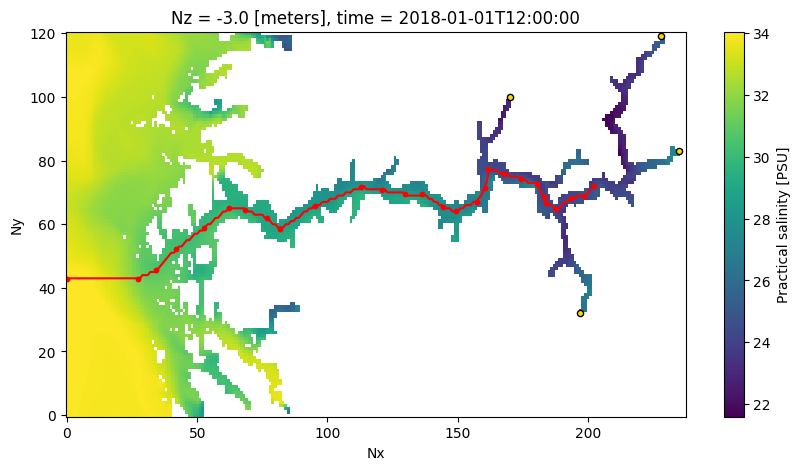

In [14]:
fig = plt.figure(figsize=(10,5))
ds.S.isel(time=0).sel(Nz=-3).plot()
plt.scatter(xs, ys, c='r', s=10)
plt.plot(xs_target, ys_target, c='r')
plt.scatter(xrivers, yrivers, c='gold', edgecolor='k', s=20)